Running Modified Problem: Scalar Field z(x,y) = 200 - x^2 - 2y^2


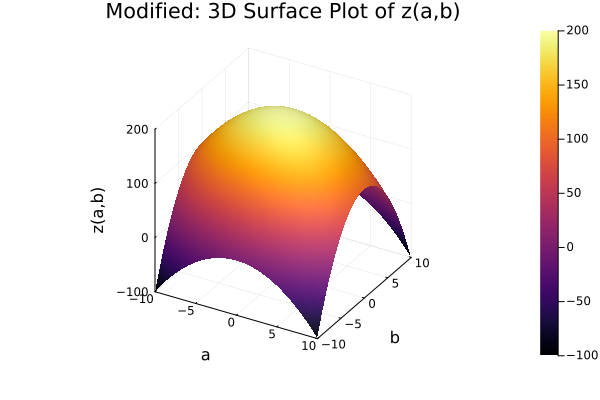

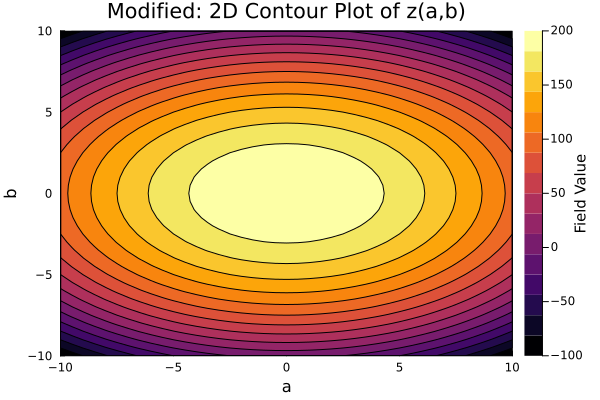

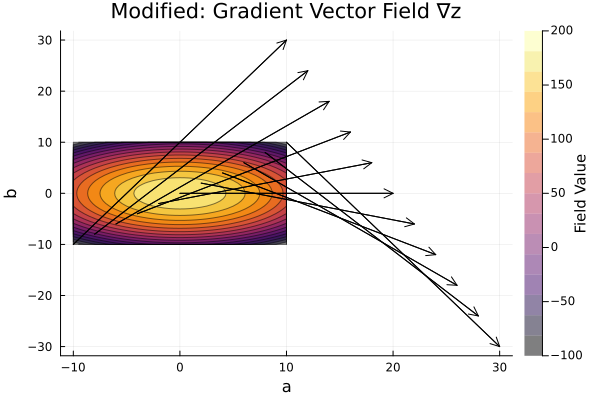

Modified Problem plots generated successfully.


In [16]:
# Question 1

using Plots
using CalculusWithJulia

# Set backend
gr()

function problem_scalarfield()
    println("Running Modified Problem: Scalar Field z(x,y) = 200 - x^2 - 2y^2")

    # Renamed scalar field
    z_field(a, b) = 200 - a^2 - 2*b^2

    # Renamed function for gradient
    z_fn(v) = 200 - v[1]^2 - 2*v[2]^2

    # Ranges
    xr = -10:0.5:10
    yr = -10:0.5:10

    # 3D surface plot
    surf_plot = surface(
        xr, yr, z_field,
        title="Modified: 3D Surface Plot of z(a,b)",
        xlabel="a", ylabel="b", zlabel="z(a,b)",
        camera=(30, 30)
    )

    # Contour plot
    cont_plot = contour(
        xr, yr, z_field,
        title="Modified: 2D Contour Plot of z(a,b)",
        xlabel="a", ylabel="b",
        fill=true,
        colorbar_title="Field Value"
    )

    display(surf_plot)
    display(cont_plot)

    savefig(surf_plot, "modified_surface.png")
    savefig(cont_plot, "modified_contour.png")

    # Gradient
    grad_z = CalculusWithJulia.gradient(z_fn)

    xa = -10:2:10
    ya = -10:2:10

    Uv = [grad_z([a, b])[1] for b in ya, a in xa]
    Vv = [grad_z([a, b])[2] for b in ya, a in xa]

    # Gradient plot
    grad_plot = contour(
        xr, yr, z_field,
        title="Modified: Gradient Vector Field ∇z",
        xlabel="a", ylabel="b",
        fill=true, opacity=0.5,
        colorbar_title="Field Value"
    )

    quiver!(
        grad_plot,
        xa, ya,
        quiver=(Uv, Vv),
        color=:black,
        arrow=true,
        label="∇z"
    )

    display(grad_plot)
    savefig(grad_plot, "modified_gradient.png")

    println("Modified Problem plots generated successfully.")
end

# Run function
problem_scalarfield()


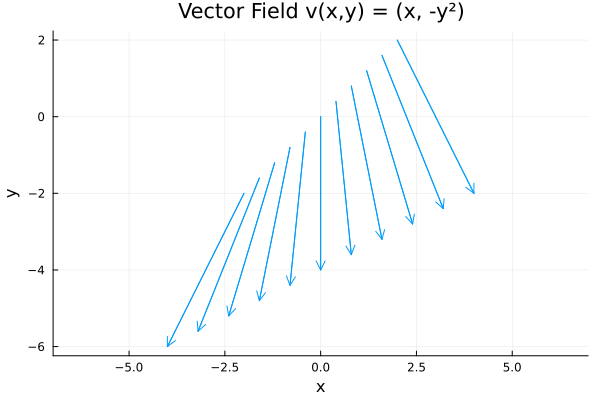

In [17]:
#Question 2

using Plots
using CalculusWithJulia
using ForwardDiff

# -----------------------------------------
# Vector Field
# v(x,y) = (x , -y^2)
# -----------------------------------------

v(x,y) = [x, -(y^2)]

# -----------------------------------------
# (a) Plot the Vector Field
# -----------------------------------------

xs = -2:0.4:2
ys = -2:0.4:2

a= [v(x,y)[1] for x in xs, y in ys]   # x-component
b = [v(x,y)[2] for x in xs, y in ys]   # y-component

quiver(xs, ys, quiver=(a, b),
    aspect_ratio=1,
    xlabel="x", ylabel="y",
    title="Vector Field v(x,y) = (x, -y²)"
)


In [18]:
# Automatic divergence
f(x) = v(x[1], x[2])
auto_div(x,y) = divergence(f, [x,y])


auto_div (generic function with 1 method)

In [19]:
manual_div(x,y) = 1 - 2y


manual_div (generic function with 1 method)

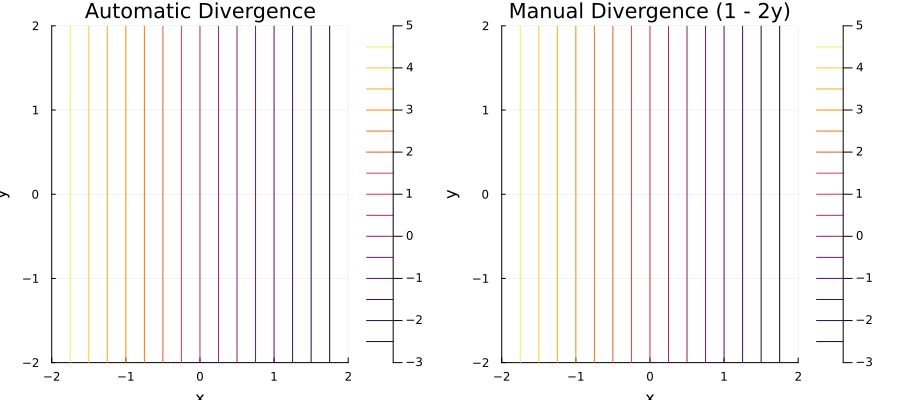

In [20]:
xs = -2:0.05:2
ys = -2:0.05:2

Z_auto = [auto_div(x,y) for x in xs, y in ys]
Z_manual = [manual_div(x,y) for x in xs, y in ys]

p1 = contour(xs, ys, Z_auto, title="Automatic Divergence", xlabel="x", ylabel="y")
p2 = contour(xs, ys, Z_manual, title="Manual Divergence (1 - 2y)", xlabel="x", ylabel="y")

plot(p1, p2, layout=(1,2), size=(900,400))


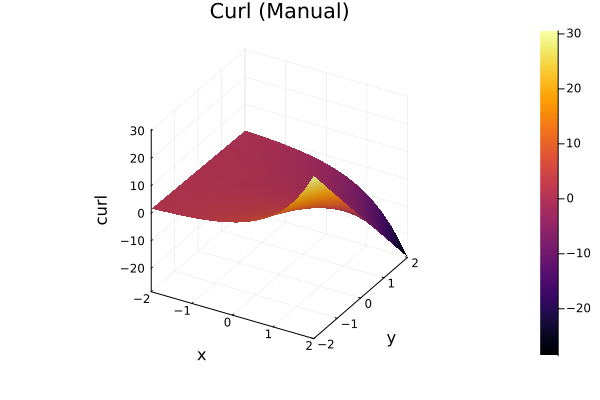

In [21]:
# Question 3

using Plots
using ForwardDiff

f1(x,y) = exp(x)*y^2
f2(x,y) = x + 2y

xs = collect(range(-2, 2, length=20))
ys = collect(range(-2, 2, length=20))

nx = length(xs)
ny = length(ys)

Umat = zeros(nx, ny)
Vmat = zeros(nx, ny)
Dauto = zeros(nx, ny)
Dmanual = zeros(nx, ny)
Cauto = zeros(nx, ny)
Cmanual = zeros(nx, ny)

for i in 1:nx, j in 1:ny
    x = xs[i]; y = ys[j]
    Umat[i,j] = f1(x,y)
    Vmat[i,j] = f2(x,y)
    Dauto[i,j] = ForwardDiff.derivative(tx -> f1(tx,y), x) + ForwardDiff.derivative(ty -> f2(x,ty), y)
    Dmanual[i,j] = exp(x)*y^2 + 2
    Cauto[i,j] = ForwardDiff.derivative(tx -> f2(tx,y), x) - ForwardDiff.derivative(ty -> f1(x,ty), y)
    Cmanual[i,j] = 1 - 2*y*exp(x)
end

Xlist = [xs[i] for i in 1:nx for j in 1:ny]
Ylist = [ys[j] for i in 1:nx for j in 1:ny]
Ulist = [Umat[i,j] for i in 1:nx for j in 1:ny]
Vlist = [Vmat[i,j] for i in 1:nx for j in 1:ny]

quiver(Xlist, Ylist, quiver=(Ulist, Vlist), aspect_ratio=1, title="Vector Field", xlabel="x", ylabel="y")

surface(xs, ys, Dauto', title="Divergence (Automatic)", xlabel="x", ylabel="y", zlabel="div")
surface(xs, ys, Dmanual', title="Divergence (Manual)", xlabel="x", ylabel="y", zlabel="div")

surface(xs, ys, Cauto', title="Curl (Automatic)", xlabel="x", ylabel="y", zlabel="curl")
surface(xs, ys, Cmanual', title="Curl (Manual)", xlabel="x", ylabel="y", zlabel="curl")


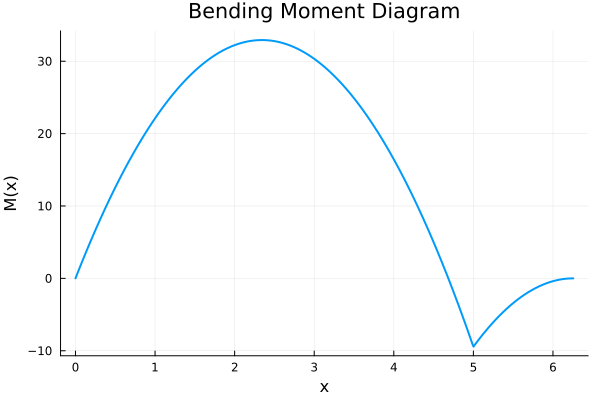

In [22]:
# Question 4
using Plots
using CalculusWithJulia

l = 5.0
q = 12.0

extra = 0.251 * l
L = l + extra

Rb = q * L * (L/2) / l
Ra = q*L - Rb

V(x) = x ≤ 0 ? 0 :
       x ≤ l ? Ra - q*x :
       x ≤ L ? Ra + Rb - q*x : 0

M(x) = x ≤ 0 ? 0 :
       x ≤ l ? Ra*x - q*x^2/2 :
       x ≤ L ? Ra*x + Rb*(x - l) - q*x^2/2 : 0

xvals = range(0, L, length=500)
Vvals = [V(x) for x in xvals]
Mvals = [M(x) for x in xvals]

plot(xvals, Vvals, title="Shear Force Diagram", xlabel="x", ylabel="V(x)", lw=2, legend=false)
plot(xvals, Mvals, title="Bending Moment Diagram", xlabel="x", ylabel="M(x)", lw=2, legend=false)


Reactions:
RA = 61.66666666666666
RB = 6.666666666666667
RC = 21.666666666666668


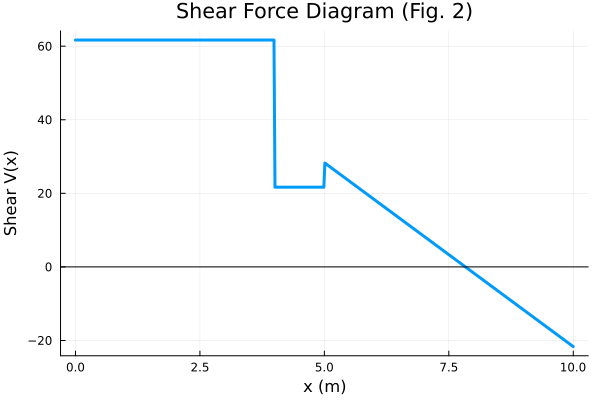

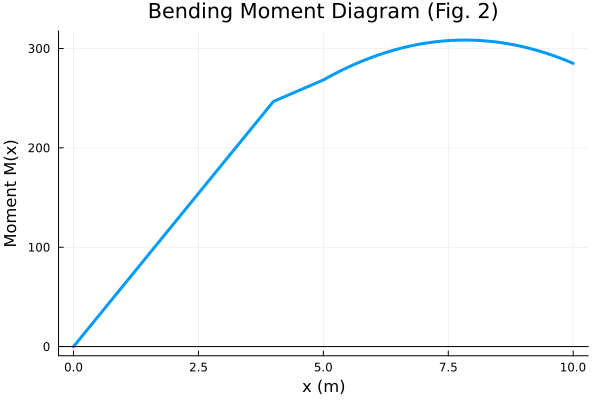

In [24]:
# Question 5

using Plots

function beam_F(q, l)

    # Reaction forces (derived formulas)
    RC = (1.3 * q * l) / 3
    RB = (0.4 * q * l) / 3
    RA = q*l + 0.8*q*l - RB - RC

    println("Reactions:")
    println("RA = $(RA)")
    println("RB = $(RB)")
    println("RC = $(RC)")

    # Key positions
    xA = 0
    xD = 0.8l
    xB = l
    xC = 2l

    # Shear force function
    function V(x)
        # Region A–D (0 to 0.8l)
        if x < xD
            return RA
        end

        # at x = D: point load 0.8ql
        if x == xD
            return RA - 0.8*q*l
        end

        # Region D–B (0.8l to l)
        if x < xB
            return RA - 0.8*q*l
        end

        # at x = B: add RB
        if x == xB
            return RA - 0.8*q*l + RB
        end

        # Region B–C (l to 2l): UDL q
        return RA - 0.8*q*l + RB - q*(x - xB)
    end

    # Bending moment function
    function M(x)
        # A–D
        if x < xD
            return RA*x
        end

        # D–B
        if x < xB
            return RA*x - 0.8*q*l*(x - xD)
        end

        # B–C
        return RA*x - 0.8*q*l*(x - xD) + RB*(x - xB) - q*(x - xB)^2/2
    end

    # Create x axis
    x = range(0, 2l, length=500)

    # Compute arrays
    Vvals = [V(xx) for xx in x]
    Mvals = [M(xx) for xx in x]

    # Plot SFD
    p1 = plot(
        x, Vvals,
        xlabel="x (m)", ylabel="Shear V(x)",
        title="Shear Force Diagram (Fig. 2)",
        linewidth=3, legend=false
    )
    hline!([0], color=:black)

    # Plot BMD
    p2 = plot(
        x, Mvals,
        xlabel="x (m)", ylabel="Moment M(x)",
        title="Bending Moment Diagram (Fig. 2)",
        linewidth=3, legend=false
    )
    hline!([0], color=:black)

    display(p1)
    display(p2)
end



beam_F(10, 5)
